# 📚 Imports

In [ ]:
!pip install autoviz

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from autoviz.classify_method import data_cleaning_suggestions
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# 📖 Data

In [65]:
df = pd.read_csv('data/Placement_Data_Full_Class.csv')

In [66]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sl_no,215.0,108.000000,62.209324,1.00,54.500,108.0,161.500,215.00
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
salary,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


In [69]:
data_cleaning_suggestions(df)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
sl_no,215,int64,0,0.000000,100.000000,0,possible ID column: drop
mba_p,205,float64,0,0.000000,95.348837,0,
ssc_p,103,float64,0,0.000000,47.906977,0,
etest_p,100,float64,0,0.000000,46.511628,0,
hsc_p,97,float64,0,0.000000,45.116279,0,
degree_p,89,float64,0,0.000000,41.395349,0,
salary,45,float64,67,31.162791,20.930233,0,"fill missing, skewed: cap or drop outliers"
hsc_s,3,object,0,0.000000,1.395349,11,
degree_t,3,object,0,0.000000,1.395349,11,
gender,2,object,0,0.000000,0.930233,76,


In [70]:
df.drop(['sl_no', 'salary'], axis = 1, inplace = True)

# 📊 Visualization 

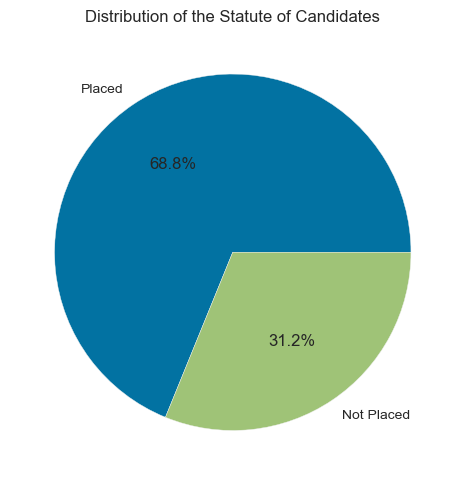

In [71]:
status_counts = df['status'].value_counts()
plt.pie(status_counts, labels = status_counts.index, autopct = '%1.1f%%')
plt.title('Distribution of the Statute of Candidates')
plt.show()

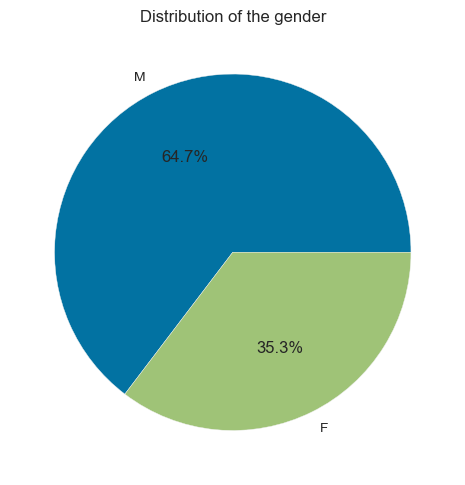

In [72]:
status_counts = df['gender'].value_counts()
plt.pie(status_counts, labels = status_counts.index, autopct = '%1.1f%%')
plt.title('Distribution of the gender')
plt.show()

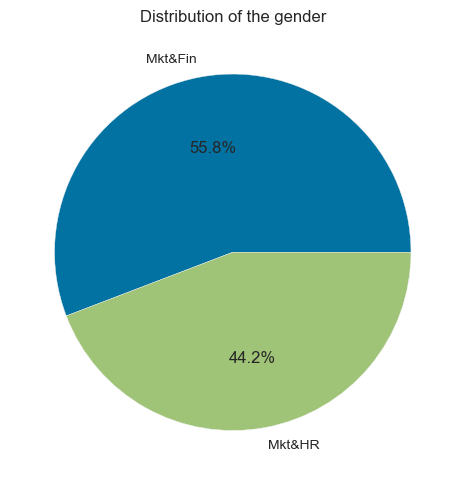

In [73]:
status_counts = df['specialisation'].value_counts()
plt.pie(status_counts, labels = status_counts.index, autopct = '%1.1f%%')
plt.title('Distribution of the gender')
plt.show()

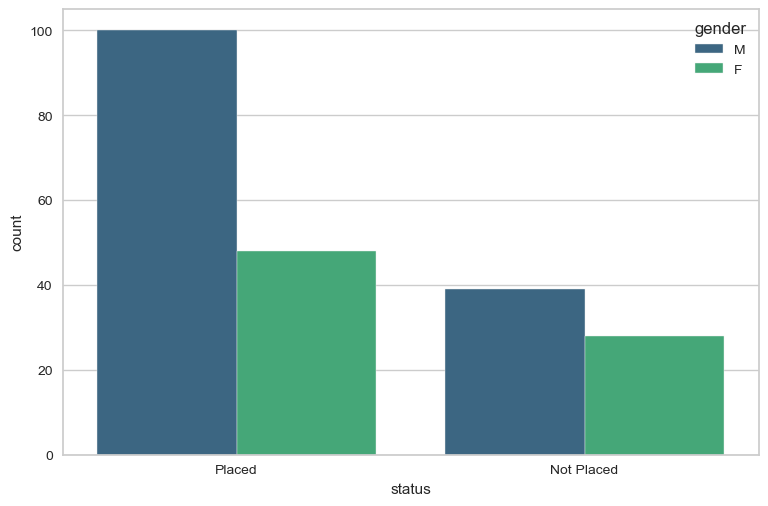

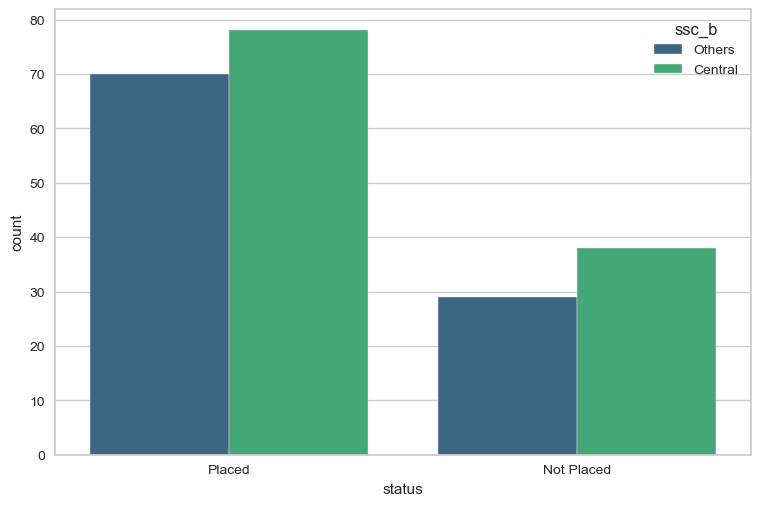

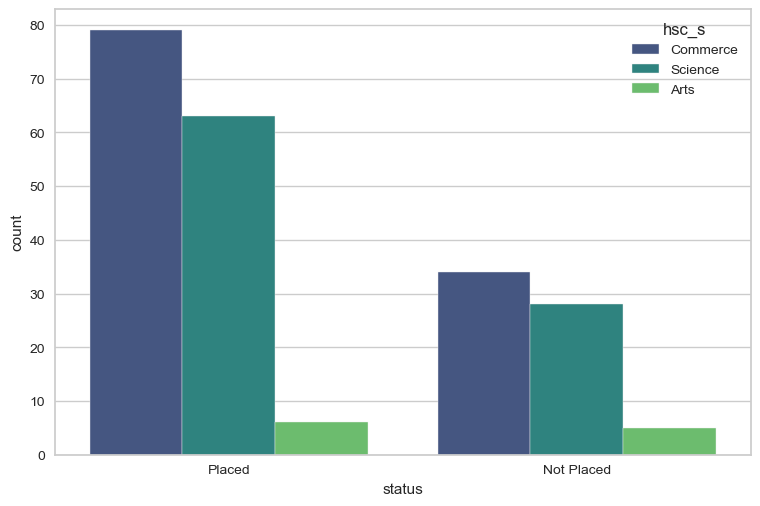

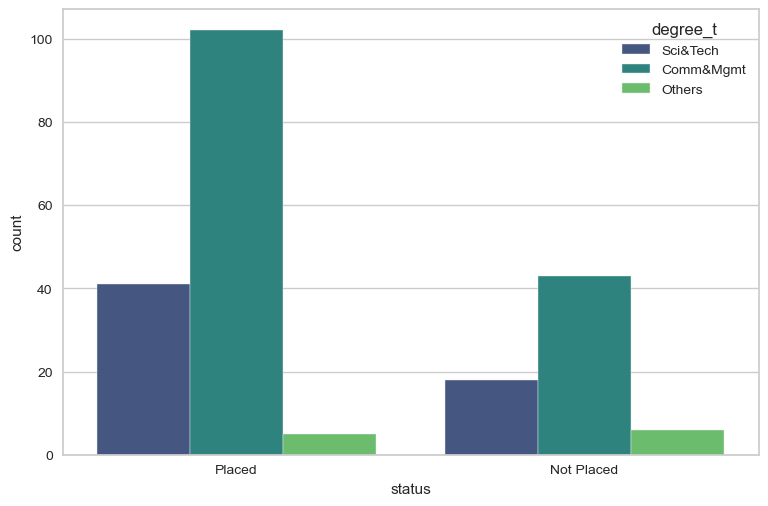

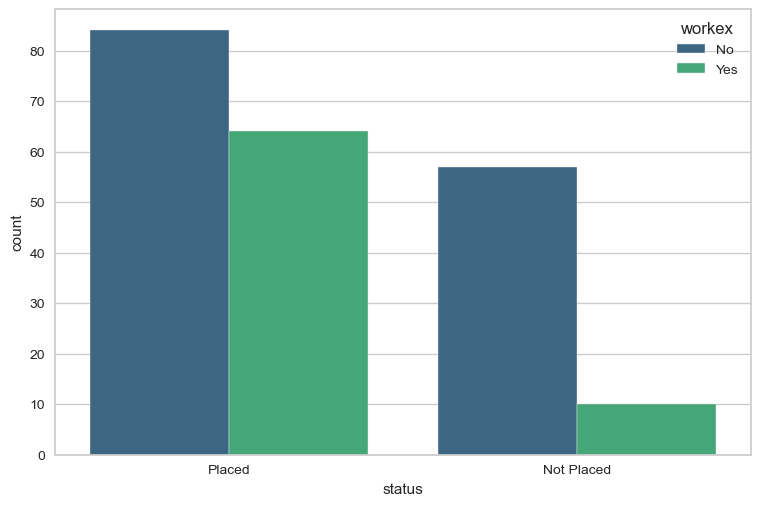

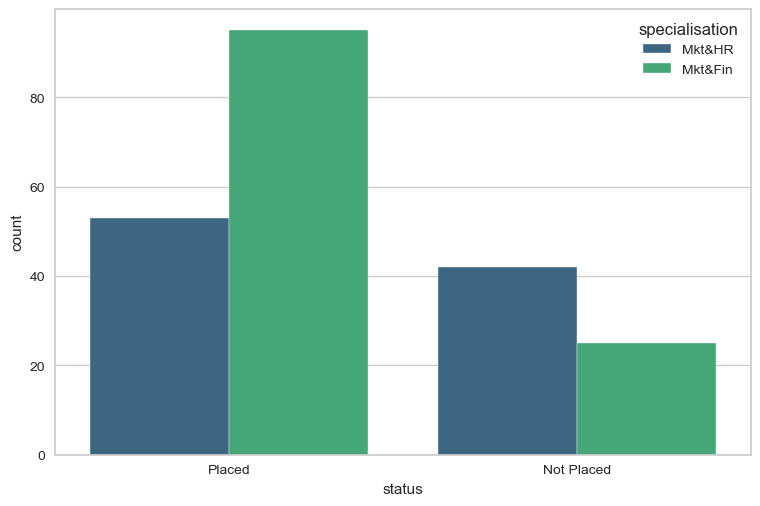

In [74]:
col_list = ['gender', 'ssc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']
for g in col_list:
    sns.countplot(data = df, x = "status", hue = g, palette = "viridis")
    plt.show()

<Figure size 800x550 with 0 Axes>

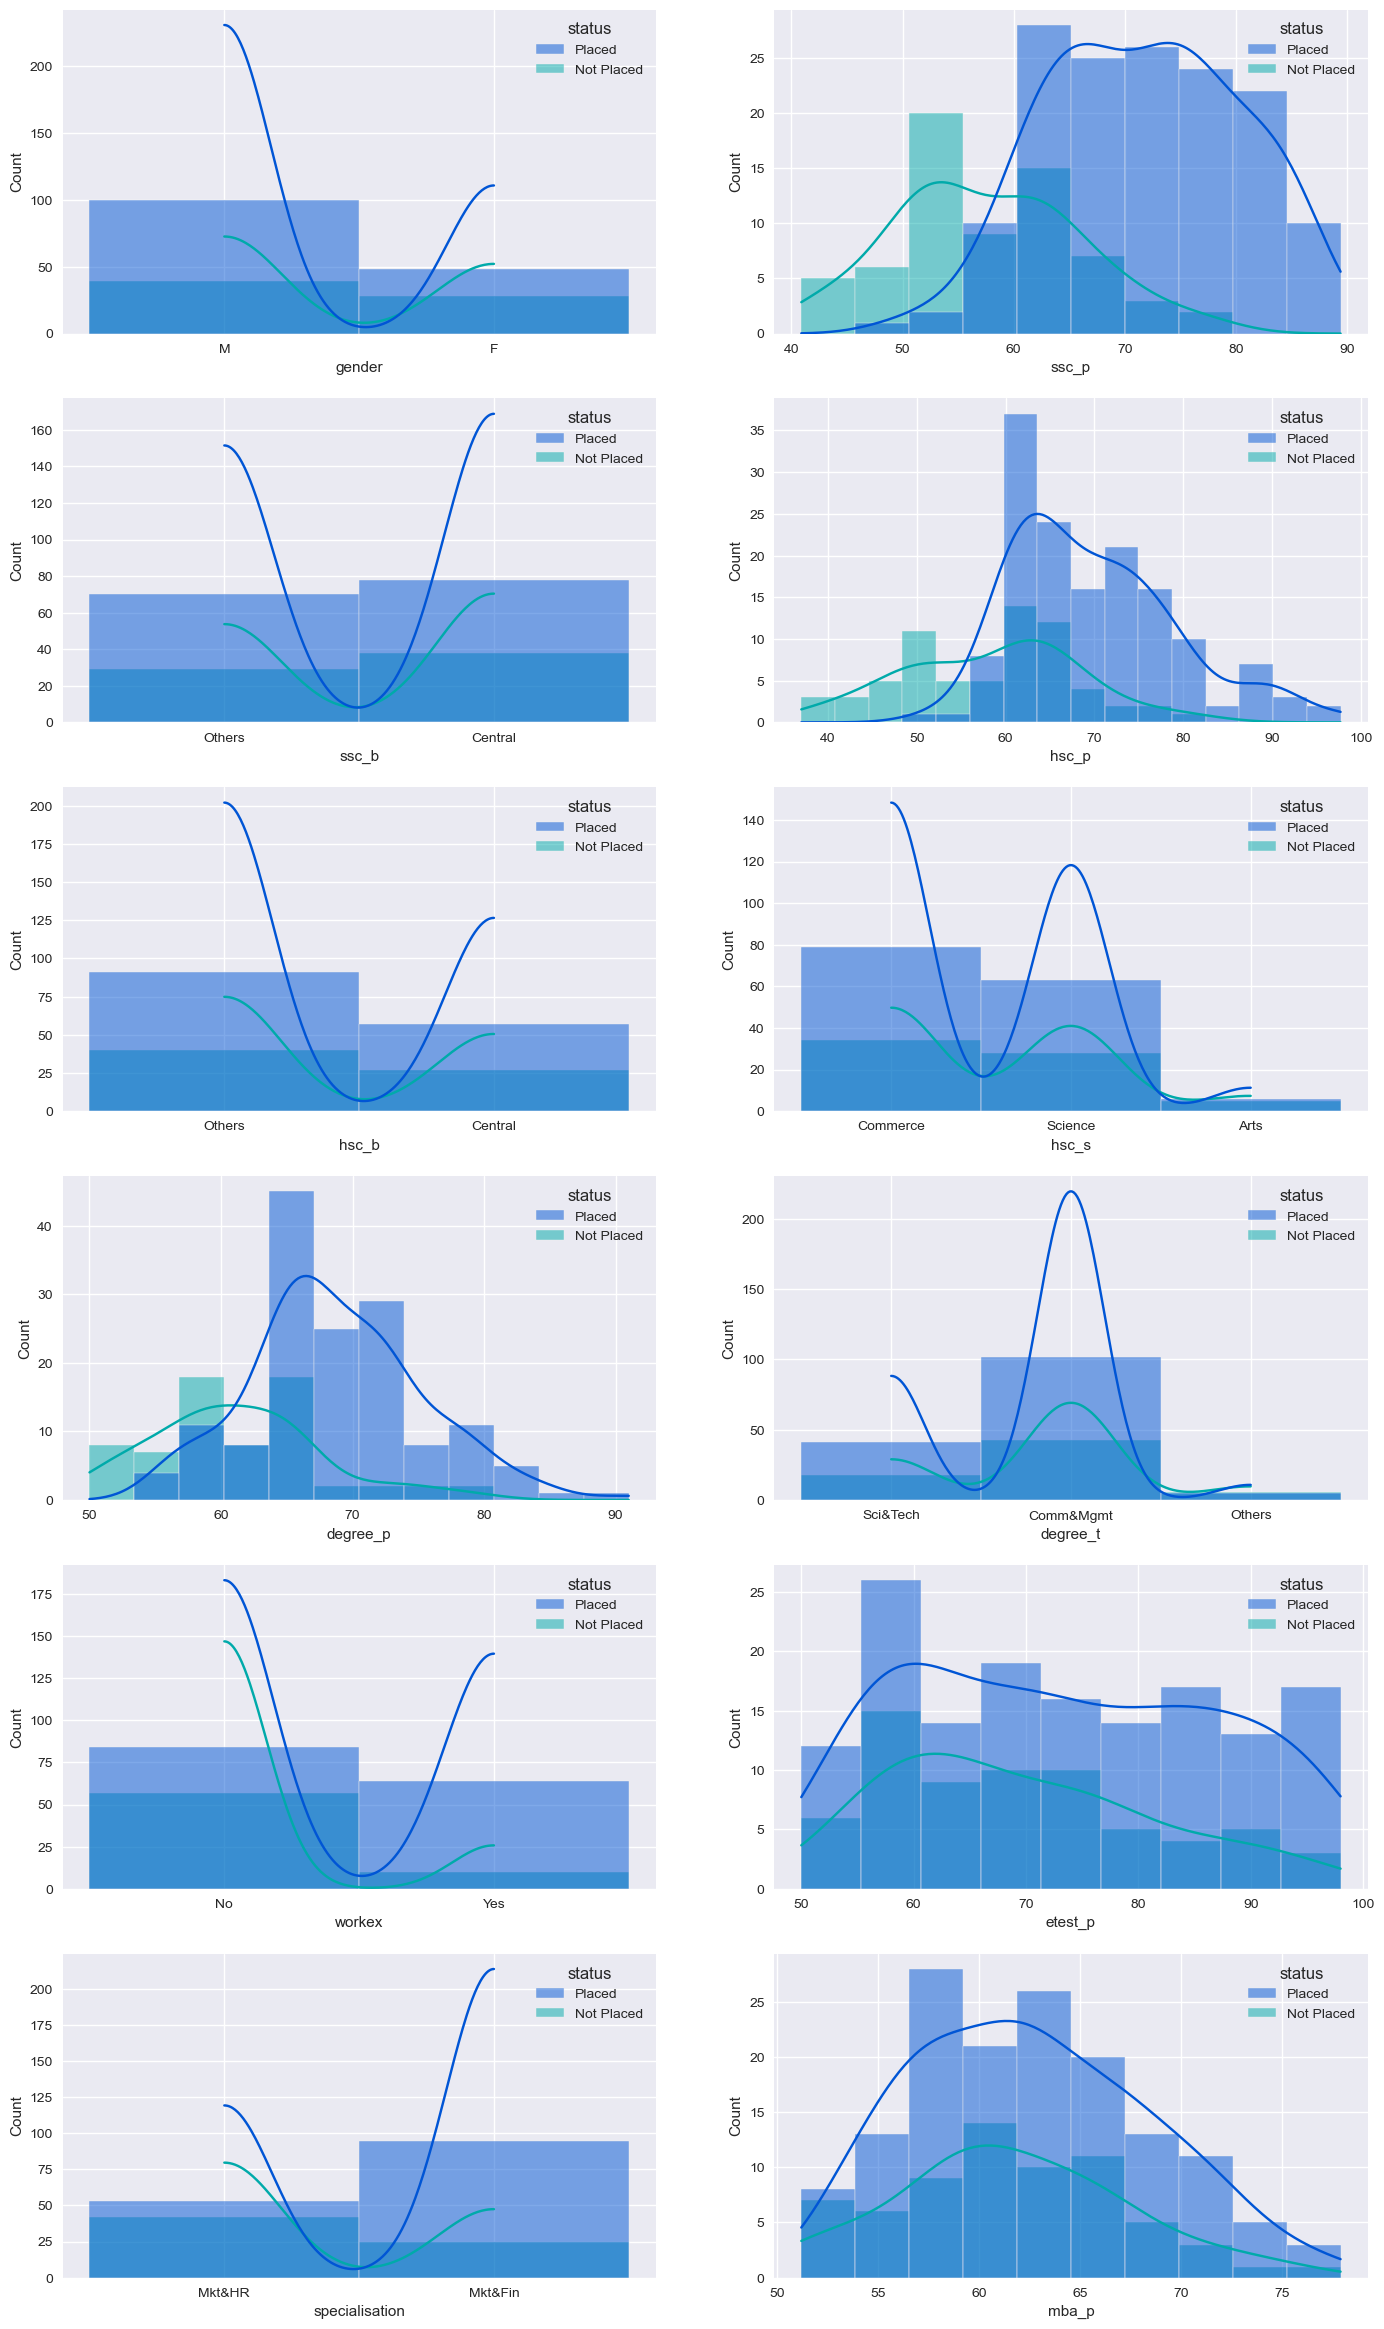

In [75]:
plt.style.use("seaborn")
plt.subplots_adjust(hspace = 0.2)
color = 'winter'

fig, axs = plt.subplots(6, 2, figsize = (15, 28))
i = 1
for feature in df.columns:
    if feature not in ['status'] and i < 14:
        plt.subplot(6, 2, i)
        sns.histplot(data = df, x = feature, kde = True, palette = color, hue = 'status')
        i += 1

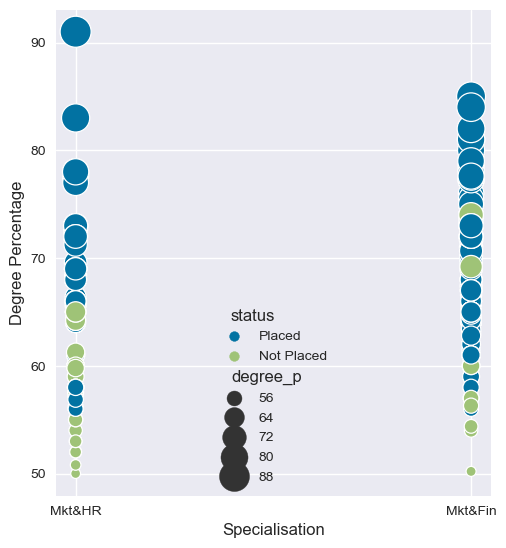

In [76]:
plt.figure(figsize = (5,6))
colors = ['b', 'g']
sns.scatterplot(data = df, x = 'specialisation', y = 'degree_p', hue = 'status',
                palette = colors, size = 'degree_p', sizes = (50, 500))

plt.xlabel('Specialisation', fontsize=12) 
plt.ylabel('Degree Percentage', fontsize=12)
plt.show()

In [77]:
df['status'] = df['status'].map({'Placed' : 1, 'Not Placed' : 0})

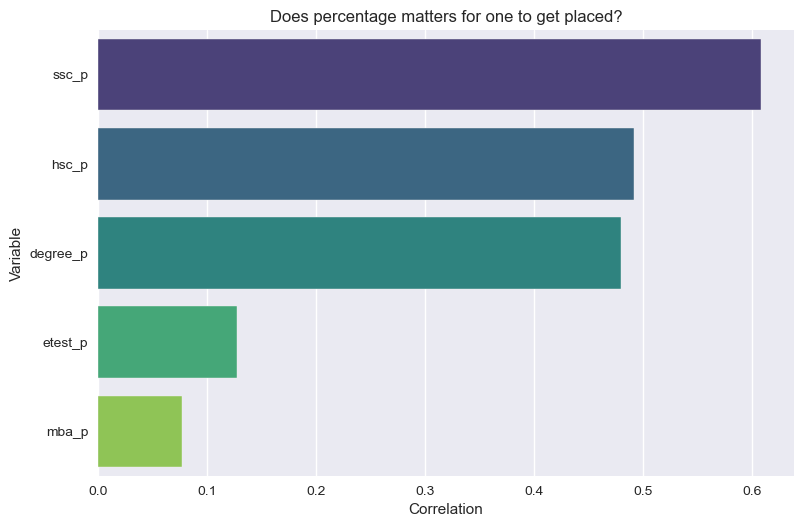

In [78]:
corr = df.corr()['status'][:-1]

sns.barplot(x = corr.values, y = corr.index, palette = 'viridis')
plt.title('Does percentage matters for one to get placed?')
plt.xlabel('Correlation')
plt.ylabel('Variable')
plt.show()

<AxesSubplot:>

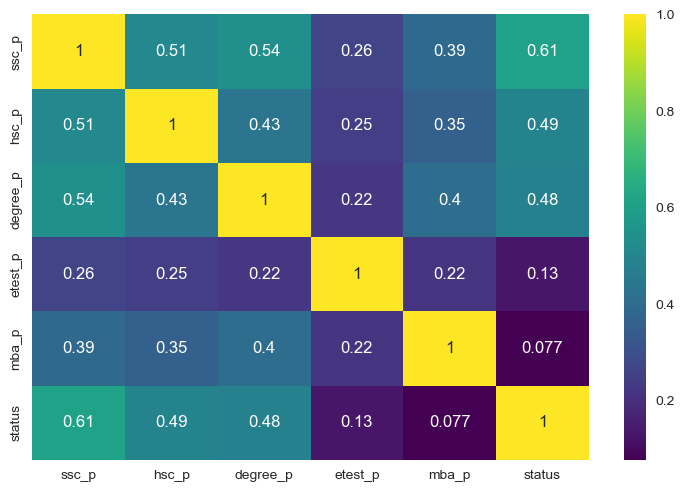

In [79]:
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

---

#  📝 Answering the questions

### **"Which factor influenced a candidate in getting placed?"**


    Looking at the graphs, I could see that:
     • There are more men who are placed than women, however, we have the participation of 64% men and 35% women.
     • Specialization and work experience is very important to be placed.
     • Percentage of secondary, upper secondary and grade has high impact to be placed


### **"Does percentage matters for one to get placed?"** 

    Yes, the percentage matters, and a lot.

### **"Which degree specialization is much demanded by corporate?"""**

    "Mkt&Fin" from 60% of "degree_p" is more required.

---

# 🧬 Object Variables for Numerics

In [80]:
list_str = df.select_dtypes(include = 'object').columns
le = LabelEncoder()

for c in list_str:
    df[c] = le.fit_transform(df[c])

# ✂️ Train and Test

In [81]:
X = df.drop('status', axis = 1)
y = df['status']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 0)

# 📋 Results

In [82]:
abc = AdaBoostClassifier()
abc.fit(xtrain, ytrain)
pred = abc.predict(xtest)

In [83]:
accuracy = accuracy_score(ytest, pred)
print('Acurácia: %f' % accuracy)

precision = precision_score(ytest, pred)
print('Precision: %f' % precision)

recall = recall_score(ytest, pred)
print('Recall: %f' % recall)

f1 = f1_score(ytest, pred)
print('F1-Score: %f' % f1)

Acurácia: 0.796296
Precision: 0.825000
Recall: 0.891892
F1-Score: 0.857143


In [84]:
lr = LogisticRegression(solver = 'liblinear') 
lr.fit(xtrain, ytrain)
pred = lr.predict(xtest)

In [85]:
accuracy = accuracy_score(ytest, pred)
print('Acurácia: %f' % accuracy)

precision = precision_score(ytest, pred)
print('Precision: %f' % precision)

recall = recall_score(ytest, pred)
print('Recall: %f' % recall)

f1 = f1_score(ytest, pred)
print('F1-Score: %f' % f1)

Acurácia: 0.814815
Precision: 0.829268
Recall: 0.918919
F1-Score: 0.871795


# 🏁 The End! Feel free to criticize! 🏁